In [1]:
"""***************************** 26th April'23 Assignment *****************************"""

"***************************** 26th April'23 Assignment *****************************"

# Dimensionality Reduction-4

## Assignment: PCA Implementation
***Objective:***
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

***Instructions:***

- Download the wine dataset from the UCI Machine Learning Repository
    - (https://archive.ics.uci.edu/ml/datasets/Wine).
- Load the dataset into a Pandas dataframe.
- Split the dataset into features and target variables.
- Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
- Implement PCA on the preprocessed dataset using the scikit-learn library.
- Determine the optimal number of principal components to retain based on the explained variance ratio.
- Visualise the results of PCA using a scatter plot.
- Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
- Interpret the results of PCA and clustering analysis.

***Deliverables:***

- Jupyter notebook containing the code for the PCA implementation.
- A report summarising the results of PCA and clustering analysis.
- Scatter plot showing the results of PCA.
- A table showing the performance metrics for the clustering algorithm.

***Additional Information:***

- You can use the python programming language.
- You can use any other machine learning libraries or tools as necessary.
- You can use any visualisation libraries or tools as necessary.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('wine.data')

In [14]:
df

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### In this dataset i am not able to understnad !
#### So, we can take another dataset instead of this Wine dataset.

In [15]:
df=pd.read_csv("diabetes.csv")

In [17]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
df.shape

(768, 9)

In [24]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

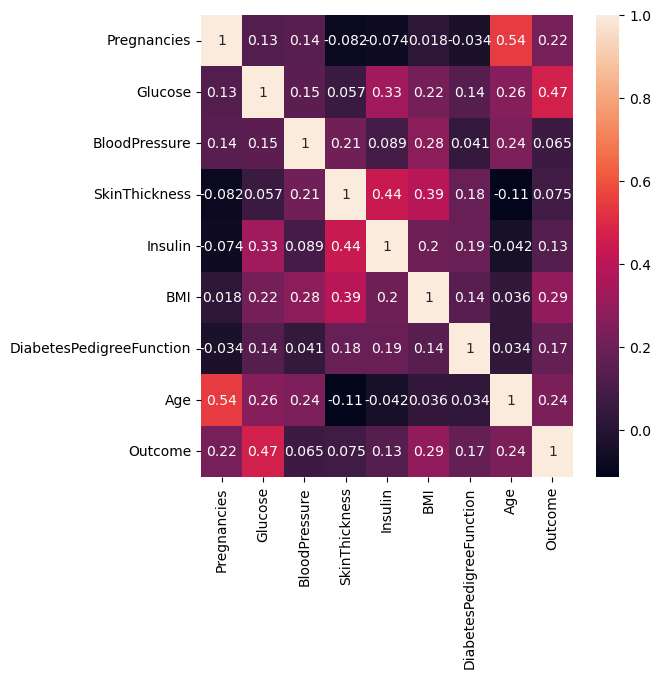

In [27]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)

### Implementation Of PCA

In [28]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.30)

In [35]:
from sklearn.preprocessing import StandardScaler
slr = StandardScaler()
X_train = slr.fit_transform(X_train)

In [36]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)

In [37]:
pca.explained_variance_ratio_

array([0.28295222, 0.187952  , 0.13322085, 0.10981081, 0.10698328,
       0.07492793, 0.05754721, 0.0466057 ])

In [38]:
pca.components_

array([[ 0.45259158,  0.28368738,  0.3233948 ,  0.36882416,  0.41503239,
         0.26415477,  0.20829459,  0.43433927],
       [ 0.27671683,  0.14399178, -0.56270732, -0.32985462, -0.19203899,
        -0.12854416,  0.57691447,  0.30169137],
       [ 0.33218591, -0.68853942, -0.19427787,  0.31586092, -0.34889648,
         0.32678168, -0.13302314,  0.17844832],
       [-0.24033357,  0.02435998, -0.05564291, -0.45174438,  0.13163059,
         0.84643604,  0.02551436,  0.00675882],
       [ 0.01776386,  0.38699551,  0.07381851,  0.38906869, -0.53450681,
         0.28360207,  0.32178948, -0.47267237],
       [-0.42847742, -0.44723755,  0.38485395,  0.05864551,  0.03401792,
        -0.07843095,  0.66950617,  0.09636737],
       [-0.25843478,  0.24085773,  0.29179267, -0.08958689, -0.56954904,
        -0.01854161, -0.22919334,  0.63621596],
       [-0.54752531,  0.12770472, -0.54702061,  0.53710708,  0.20142717,
         0.05943967, -0.03347164,  0.22575572]])

In [39]:
pca.n_features_

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


8